#### LOAD LIBRARIES

In [1]:
# Pulizia
from IPython import get_ipython
get_ipython().magic('clear')
get_ipython().magic('reset -f')

# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import itertools
import time
import sys

# Import user defined libraries:
from fom import full_order_solution

/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_7023/436326231.py:3: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')
/var/folders/gs/p2p59ns16hlgpqv_027665gm0000gn/T/ipykernel_7023/436326231.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -f')


#### DEFINE PROBLEM PARAMETERS

In [2]:
full_order_solution(TIME_FINAL = 1.00E+07, TIME_DELTA = 1.00E+04)

Current time: 0.0 s
Average dC: 0.0 atm/m^3

Current time: 10000.0 s
Average dC: 6.100103038928917e+22 atm/m^3

Current time: 20000.0 s
Average dC: 1.167132738911087e+23 atm/m^3

Current time: 30000.0 s
Average dC: 1.6858685837640165e+23 atm/m^3

Current time: 40000.0 s
Average dC: 2.1735096190096466e+23 atm/m^3

Current time: 50000.0 s
Average dC: 2.6346331637760424e+23 atm/m^3

Current time: 60000.0 s
Average dC: 3.0724561787863396e+23 atm/m^3

Current time: 70000.0 s
Average dC: 3.489407110501666e+23 atm/m^3

Current time: 80000.0 s
Average dC: 3.887396369718647e+23 atm/m^3

Current time: 90000.0 s
Average dC: 4.267990831512247e+23 atm/m^3

Current time: 100000.0 s
Average dC: 4.632498216196564e+23 atm/m^3

Current time: 110000.0 s
Average dC: 4.982039745772716e+23 atm/m^3

Current time: 120000.0 s
Average dC: 5.317590034720324e+23 atm/m^3

Current time: 130000.0 s
Average dC: 5.640008530394255e+23 atm/m^3

Current time: 140000.0 s
Average dC: 5.9500586778751254e+23 atm/m^3

Current

KeyboardInterrupt: 

OpenFOAM average concentration (@ final time): 4.50696e+24 atm/m^3
Python average concentration (@ final time): 4.510621327059395e+24 atm/m^3
Relative error (@ final time): 0.08124%


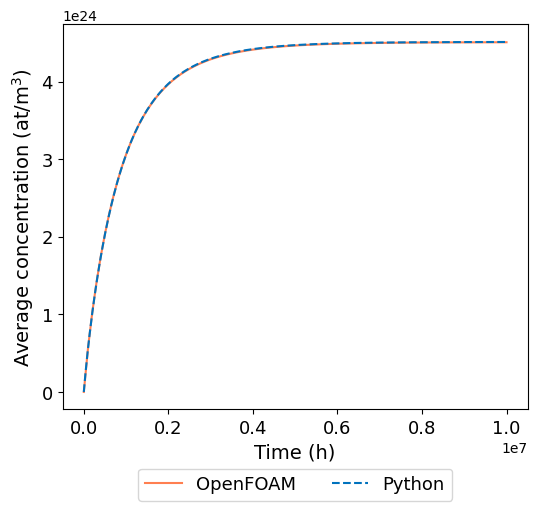

In [ ]:
OpenFOAM=np.loadtxt("data/volFieldValue.dat")     #HF in OpenFOAM
print('OpenFOAM average concentration (@ final time):', OpenFOAM[-1,1], 'atm/m^3')         #Concentrazione media OpenFOAM
df = pd.read_csv('data/Solution.csv')

fig, (ax1) = plt.subplots(1,  figsize=[6,5])
ax1.plot(OpenFOAM[:,0],OpenFOAM[:,1], color='#FF7F50', label='OpenFOAM', linewidth=1.5)
ax1.plot(df['Time (s)'], df['Average dC (atm/m^3)'], '--',color='#0072bd', label='Python', linewidth=1.5)
ax1.set_xlabel('Time (h)', fontsize=14)
ax1.set_ylabel('Average concentration (at/m$^3$)',fontsize=14)
ax1.tick_params(axis="x", labelsize=13)
ax1.tick_params(axis="y", labelsize=13)
ax1.title('')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), fancybox=True, shadow=False, ncol=2, fontsize=13)

print('Python average concentration (@ final time):', df['Average dC (atm/m^3)'].iloc[-1], 'atm/m^3')  #Concentrazione media python
errore_end= (np.abs((OpenFOAM[-1,1]-df['Average dC (atm/m^3)'].iloc[-1]))/(OpenFOAM[-1,1]))*100
print(rf'Relative error (@ final time): {errore_end:.5f}%')


#error = (np.abs((OpenFOAM[:,1]-df['Average dC (atm/m^3)'].iloc[:]))/(OpenFOAM[:,1]))*100
#print(np.max(error))